# Анализ оттока клиентов банка "Метанпром"

**Презентация**
<br>https://disk.yandex.ru/i/WjWlLfHSfWT8dA

**Описание проекта:**

В последнее время в банке повысился отток клиентов. Отдел маркетинга обратился с запросом на выявление сегментов отточных клиентов, на которые можно воздействовать, чтобы снизить отток.

**Заказчик:**

Отдел маркетинга.

**Цель проекта:**

Необходимо проанализировать отток клиентов банка, выделить наиболее склонные к оттоку сегменты пользователей. Дать рекомендации отделу маркетинга по снижению оттока.

**Описание данных:**

* USERID — идентификатор пользователя,
* score — баллы кредитного скоринга,
* city — город,
* gender — пол,
* age — возраст,
* equity — приблизительная оценка собственности клиента,
* balance — баланс на счёте,
* products — количество продуктов, которыми пользуется клиент,
* credit_card — есть ли кредитная карта,
* last_activity — был ли клиент активен последнее время,
* EST_SALARY — оценочная заработная плата клиента
* churn — уходит или нет

**Декомпозиция:**
1. Загрузить файл с данными и изучить общую информацию.
2. Предобработка данных.
* Привести названия столбцов к нижнему регистру;
* Проверить и обработать пропуски;
* Преобразовать данные в нужные типы;
* Проверить и обработать дубликаты.
* Проверить выбросы и аномалии в данных.
3. Исследовательский анализ.
* Составить общий портрет клиентов;
* Составить портреты клиентов по оттоку и сравнить их;
* Построить столбчатые гистограммы и распределения признаков по отточным и оставшимся клиентам;
* Построить матрицу корреляций оттока.
4. Проверка статистических гипотез.
* Формулировка гипотез;
* Обоснование применения метода оценивания;
* Проверка и интерпретация результата.
5. Промежуточные выводы о том, какие показатели влияют на отток.
6. Сегментация на основе стратегических показателей.
* Необходимо выделить несколько признаков для выделения сегментов. Посчитать размер сегмента и процент оттока.
7. Общий вывод и рекомендации.

## Загрузка данных

In [279]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [280]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix
from matplotlib.lines import Line2D
import numpy as np
import itertools
import scipy.stats as stats
pd.set_option('display.float_format', '{:.4f}'.format)
import warnings
warnings.filterwarnings('ignore')

In [281]:
try:
    df = pd.read_csv('/datasets/bank_scrooge.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [282]:
df.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0000,Рыбинск,Ж,25.0000,1,59214.8200,2,0,1,75719.1400,1
1,146556,861.0000,Рыбинск,Ж,37.0000,5,850594.3300,3,1,0,86621.7700,0
2,120722,892.0000,Рыбинск,Ж,30.0000,0,NaN,1,1,1,107683.3400,0
3,225363,866.0000,Ярославль,Ж,51.0000,5,1524746.2600,2,0,1,174423.5300,1
4,157978,730.0000,Ярославль,М,34.0000,5,174.0000,1,1,0,67353.1600,1
5,202305,856.0000,Рыбинск,М,56.0000,4,863687.2400,3,1,0,156619.8000,0
6,177259,807.0000,Ярославль,Ж,39.0000,3,405042.4400,3,0,1,103838.3200,0
7,218868,825.0000,Ярославль,Ж,38.0000,4,458145.4000,2,1,1,68085.4800,0
8,211686,923.0000,Ярославль,М,54.0000,5,1206337.8700,2,1,0,155371.7900,0
9,133130,906.0000,Ярославль,Ж,67.0000,0,NaN,1,0,1,238055.5300,0


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


**Вывод:**
<br>Датафрейм df содержит 12 столбцов и 10000 строк. Вес датафрейма 937.6 Кб.  В 2 столбцах имеются пропущенные значения. На следующем этапе определим их количество и заполним пропуски там, где это необходимо. Столбец age необходимо привести к типу int64. Названия столбцов необходимо привести к змеиному стилю. 

## Предобработка данных

### Приведение столбцов к змеиному стилю

In [284]:
# Приведем названия столбцов к стилю snake_case
df = df.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'})
print(df.columns)

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')


### Проверка и обработка пропусков

In [285]:
# Проверка пропусков
df.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [286]:
'{:.1%}'.format((df[df['age'].isna()].shape[0]/df['age'].shape[0]))

'0.3%'

В столбце age количество пропусков составляет 0.3% от всех данных, поэтому их можно удалить без потери в качестве данных. Возможные причины появления пропусков: пользователи намеренно не указали возраст, ошибки в сборе данных, технические проблемы при передаче или хранении данных.

In [287]:
# Удалим пропуски в столбце age
df = df.dropna(subset=['age'])
print(df['age'].isna().sum())

0


In [288]:
'{:.1%}'.format((df[df['balance'].isna()].shape[0]/df['balance'].shape[0]))

'22.8%'

В столбце balance количество пропусков составляет 22.8% от всех данных, поэтому их невозможно удалить без потери в качестве данных. 

In [289]:
# Посмотрим на средние значения датафрейма с пропусками
df[df['balance'].isna()].describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2279.0000,2279.0000,2279.0000,2279.0000,0.0000,2279.0000,2279.0000,2279.0000,2279.0000,2279.0000
mean,171904.8859,865.3572,42.0930,0.0513,NaN,1.1632,0.8153,0.5489,226345.4175,0.0057
std,33303.2153,89.5537,11.9416,0.2266,NaN,0.4037,0.3882,0.4977,199825.5914,0.0753
min,114182.0000,642.0000,18.0000,0.0000,NaN,0.0000,0.0000,0.0000,20274.0300,0.0000
25%,142992.5000,871.0000,33.0000,0.0000,NaN,1.0000,1.0000,0.0000,120217.3850,0.0000
50%,172304.0000,903.0000,40.0000,0.0000,NaN,1.0000,1.0000,1.0000,174347.8700,0.0000
75%,201257.0000,922.0000,49.0000,0.0000,NaN,1.0000,1.0000,1.0000,240372.7750,0.0000
max,229145.0000,990.0000,86.0000,3.0000,NaN,3.0000,1.0000,1.0000,1333687.3600,1.0000


In [290]:
# Посмотрим на средние значения датафрейма без пропусков
df[~df['balance'].isna()].describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,7695.0000,7695.0000,7695.0000,7695.0000,7695.0000,7695.0000,7695.0000,7695.0000,7695.0000,7695.0000
mean,171710.8923,843.7441,42.9244,3.3948,827245.5875,2.0812,0.6402,0.5151,124520.3943,0.2347
std,33812.8624,55.3425,12.2440,1.5848,1980327.4097,0.7574,0.4800,0.4998,104667.1062,0.4238
min,94561.0000,689.0000,18.0000,0.0000,0.0000,1.0000,0.0000,0.0000,2546.3000,0.0000
25%,142638.0000,801.0000,33.0000,2.0000,295698.7150,2.0000,0.0000,0.0000,67556.9800,0.0000
50%,172710.0000,840.0000,40.0000,4.0000,524295.3300,2.0000,1.0000,1.0000,106250.1800,0.0000
75%,201145.5000,882.0000,52.0000,5.0000,980051.2150,2.0000,1.0000,1.0000,155144.6000,0.0000
max,229136.0000,1000.0000,86.0000,9.0000,119113552.0100,5.0000,1.0000,1.0000,1395064.4500,1.0000


Видно, что пропуски в столбце balance не являются ошибкой. Клиенты с пропусками имеют низкие баллы собственнности, пользуются меньшим количеством продуктов и чаще испольуют кредитные карты. Возможно, клиенты с пропусками являются новыми клиентами, у которых нет оценки собственности, продуктов и открытого счета. Также это могут быть клиенты, которые пользуются только кредитной картой и у них нет дебетового счета. Пропуски оставляем, чтобы не искажать данные.

### Замена типов данных

In [291]:
df['age'] = df['age'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1013.0+ KB


### Проверка и обработка дубликатов

In [292]:
# Проверка таблицы на явные дубликаты
df.duplicated().sum()

0

In [293]:
# Проверим, есть ли дубликаты по user_id
df['user_id'].duplicated().sum()

50

In [294]:
# Посмотрим на строки с дубликатами user_id
df[df.duplicated(subset = ['user_id'])]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1583,190253,726.0000,Ярославль,М,49,0,NaN,1,1,1,177700.7800,0
1837,210662,896.0000,Рыбинск,Ж,37,0,NaN,2,0,0,90916.0400,0
2138,131419,739.0000,Рыбинск,Ж,37,3,1307941.6500,3,0,0,103867.4700,0
2302,220816,934.0000,Рыбинск,Ж,74,5,1294285.3900,3,1,0,95606.8000,0
2998,208081,821.0000,Рыбинск,Ж,62,3,493608.2600,2,1,1,33491.4500,0
3039,170312,813.0000,Рыбинск,Ж,47,3,370027.6700,2,0,0,129835.5600,0
3106,185748,912.0000,Ярославль,Ж,47,5,1598218.9800,2,0,0,180256.9800,0
3817,211130,918.0000,Рыбинск,Ж,55,0,NaN,2,1,1,244202.0400,0
4186,217643,804.0000,Рыбинск,Ж,40,2,301836.6500,2,1,1,81137.2200,0
4216,226719,903.0000,Рыбинск,Ж,63,0,NaN,1,1,0,138582.5800,0


In [295]:
df[df['user_id'] == 190253]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
231,190253,823.0000,Рыбинск,М,37,4,373348.3900,2,0,1,131947.9200,1
1583,190253,726.0000,Ярославль,М,49,0,NaN,1,1,1,177700.7800,0


In [296]:
df[df['user_id'] == 210792]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4986,210792,884.0000,Рыбинск,М,48,4,2228037.2000,2,0,1,207978.0900,1
7814,210792,839.0000,Ярославль,М,42,2,662646.9700,1,1,0,138403.6000,0


In [297]:
df[df['user_id'] == 168998]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5020,168998,886.0000,Ярославль,Ж,35,4,394780.6100,2,1,1,510577.1000,1
9785,168998,895.0000,Рыбинск,М,44,0,282653.5300,3,0,0,255296.4700,0


Видно, что данные строки не являются дубликатами, значения в остальных столбцах разные. Поскольку столбец user_id не требуется для анализа данных, его можно оставить без изменений.

### Проверка выбросов и аномалий в данных

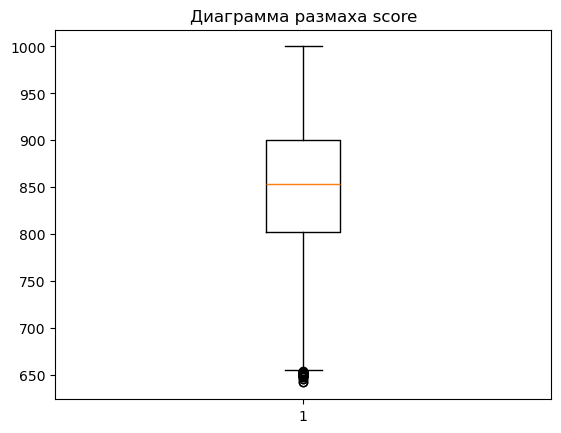

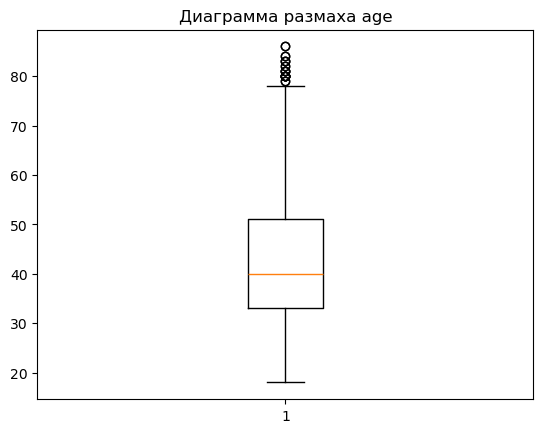

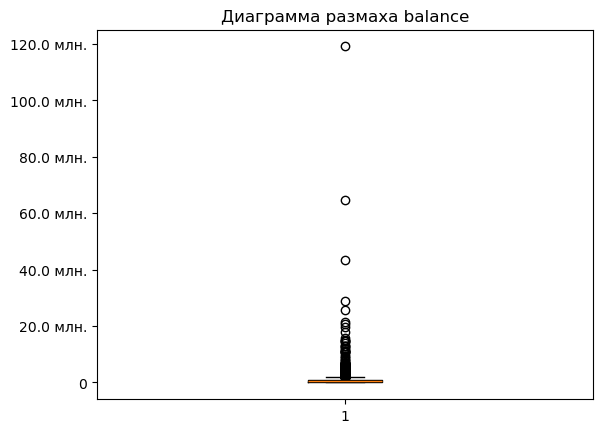

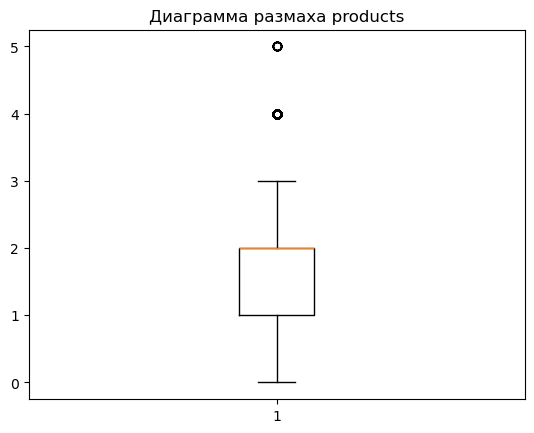

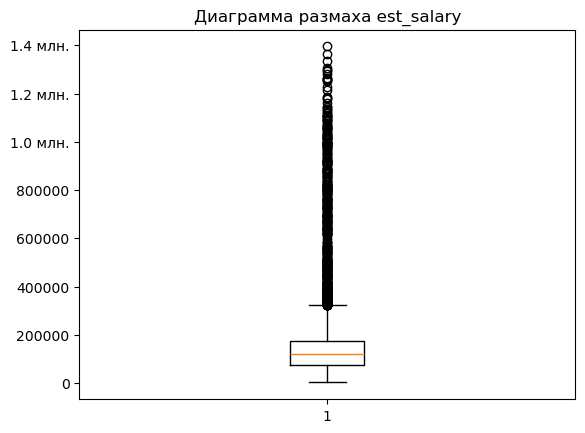

In [298]:
# Построим диаграммы размаха в столбцах с количественными характеристиками
columns = ['score', 'age', 'balance', 'products', 'est_salary']

for i in columns:
    plt.figure()
    plt.boxplot(df[i].dropna())
    plt.title(f'Диаграмма размаха {i}')
    
    # Получение текущих меток оси Y
    y_labels = plt.gca().get_yticks()
    
    # Форматирование меток оси Y
    new_labels = []
    for label in y_labels:
        if label >= 1000000:
            new_labels.append(f'{label / 1000000:.1f} млн.')
        else:
            new_labels.append(f'{int(label)}')
    
    # Установка новых меток оси Y
    plt.gca().set_yticklabels(new_labels)
    
    # Отображение графика
    plt.show()

Если человек является клиентом банка, то он должен пользоваться хотя бы 1 продуктом, поэтому удалим выбросы со значением продукта 0. Остальные выбросы оставим, чтобы не искажать данные. Могут быть клиенты с низким кредитным рейтингом, старше 80 лет, с очень большим или маленьким балансом балансом и зарплатой.

In [299]:
# Проверим количество записей с нулевым значением products
print((df['products'] == 0).sum())

1


In [300]:
# Удалим запись с нулевым продуктом
df = df.query('products>0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9973 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   int64  
 1   score          9973 non-null   float64
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   int64  
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_salary     9973 non-null   float64
 11  churn          9973 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1012.9+ KB


In [301]:
# Проверим уникальные значения в столбце city
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [302]:
# Проверим уникальные значения в столбце gender
df['gender'].unique()

array(['Ж', 'М'], dtype=object)

In [303]:
# Проверим уникальные значения в столбце credit_card
df['credit_card'].unique()

array([0, 1])

In [304]:
# Проверим уникальные значения в столбце last_activity
df['last_activity'].unique()

array([1, 0])

In [305]:
# Проверим уникальные значения в столбце churn
df['churn'].unique()

array([1, 0])

В столбцах city, gender, credit_card, last_activity, churn корректные данные.

**Вывод:**
* Столбцы были приведены к стилю snake_case.
* Обработаны пропуски. Были удалены 26 строк с пропусками в столбце age. В столбце balance пропуски были оставлены, поскольку данные не являются ошибкой.
* Явных и неявных дубликатов не обнаружено.
* Столбец age привели к типу int64.
* Была удалена 1 строка с аномальным значением в столбце products.

#### Исследовательский анализ данных

##### Общий портрет клиентов

In [306]:
# Переведем обозначение пола клиента в численные значения, где женский пол = 0, мужской пол = 1
df['gender'] = df['gender'].replace({'Ж': 0, 'М': 1})

In [307]:
# Изучим средние значения и стандартные отклонения
df.drop(columns=['user_id']).describe().T

,count,mean,std,min,25%,50%,75%,max
score,9973.0000,848.6712,65.3932,642.0000,802.0000,853.0000,900.0000,1000.0000
gender,9973.0000,0.5005,0.5000,0.0000,0.0000,1.0000,1.0000,1.0000
age,9973.0000,42.7308,12.1752,18.0000,33.0000,40.0000,51.0000,86.0000
equity,9973.0000,2.6308,1.9801,0.0000,0.0000,3.0000,4.0000,9.0000
balance,7695.0000,827245.5875,1980327.4097,0.0000,295698.7150,524295.3300,980051.2150,119113552.0100
products,9973.0000,1.8717,0.7925,1.0000,1.0000,2.0000,2.0000,5.0000
credit_card,9973.0000,0.6802,0.4664,0.0000,0.0000,1.0000,1.0000,1.0000
last_activity,9973.0000,0.5229,0.4995,0.0000,0.0000,1.0000,1.0000,1.0000
est_salary,9973.0000,147799.1152,139287.0753,2546.3000,75252.0200,119643.0600,174499.9600,1395064.4500
churn,9973.0000,0.1823,0.3861,0.0000,0.0000,0.0000,0.0000,1.0000


**Вывод**
* Баллы кредитного скоринга находятся в диапазоне от 642 до 1000. Средний уровень кредитного скоринга - 849 баллов.
* Пол представлен примерно поровну.
* Средний возраст клиентов - 43 года. Максимальный - 86 лет.
* Приблизительная оценка собственности клиента, в среднем, составляет 2.6 баллов. Максимальная - 9 баллов.
* Медианный баланс клиентов составляет 524295 руб.
* В среднем, клиенты пользуются 1-2 продуктами.
* 68% клиентов пользуются кредитными картами.
* 52% клиентов были активными в последнее время.
* Медианная заработная плата клиентов составляет 119643 руб.
* Среднее значение оттока - 18%.

##### Портрет клиентов по оттоку

In [308]:
# Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался
df.drop(columns=['user_id']) \
  .select_dtypes(include=['number']) \
  .groupby('churn') \
  .agg(['mean', 'median']).T

churn                          0            1
score         mean      845.3962     863.3619
              median    848.0000     866.0000
gender        mean        0.4670       0.6507
              median      0.0000       1.0000
age           mean       43.0208      41.4296
              median     40.0000      39.0000
equity        mean        2.3783       3.7635
              median      3.0000       4.0000
balance       mean   733031.6301 1134458.2093
              median 475410.0900  783908.9000
products      mean        1.7589       2.3773
              median      2.0000       2.0000
credit_card   mean        0.7089       0.5517
              median      1.0000       1.0000
last_activity mean        0.4829       0.7024
              median      0.0000       1.0000
est_salary    mean   147674.6379  148357.4832
              median 118227.6000  125408.8800

**Вывод**
* Средний балл кредитного скоринга немного выше у отточных клиентов (863 и 845 соответственно).
* Среди отточных клиентов больше мужчин (65%), чем у оставшихся (46%).
* Медианное значение возраста обоих групп почти равно.
* Оценка собственности у отточных клиентов выше.
* Медианный баланс у отточных клиентов выше (783908 руб. и 475410 руб. соответственно).
* Количество продукто у клиентов обоих групп одинаковое - 2.
* Клиенты, попавшие в отток, реже пользуются кредитными картами (55%), чем оставшиеся (70%).
* Активность в последнеее время у отточных клиентов выше (70% и 48% соответственно).
* Средние заработные платы у клиентов обоих групп почти равны. Медианная заработная плата у отточных клиентов немного выше.

##### Столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

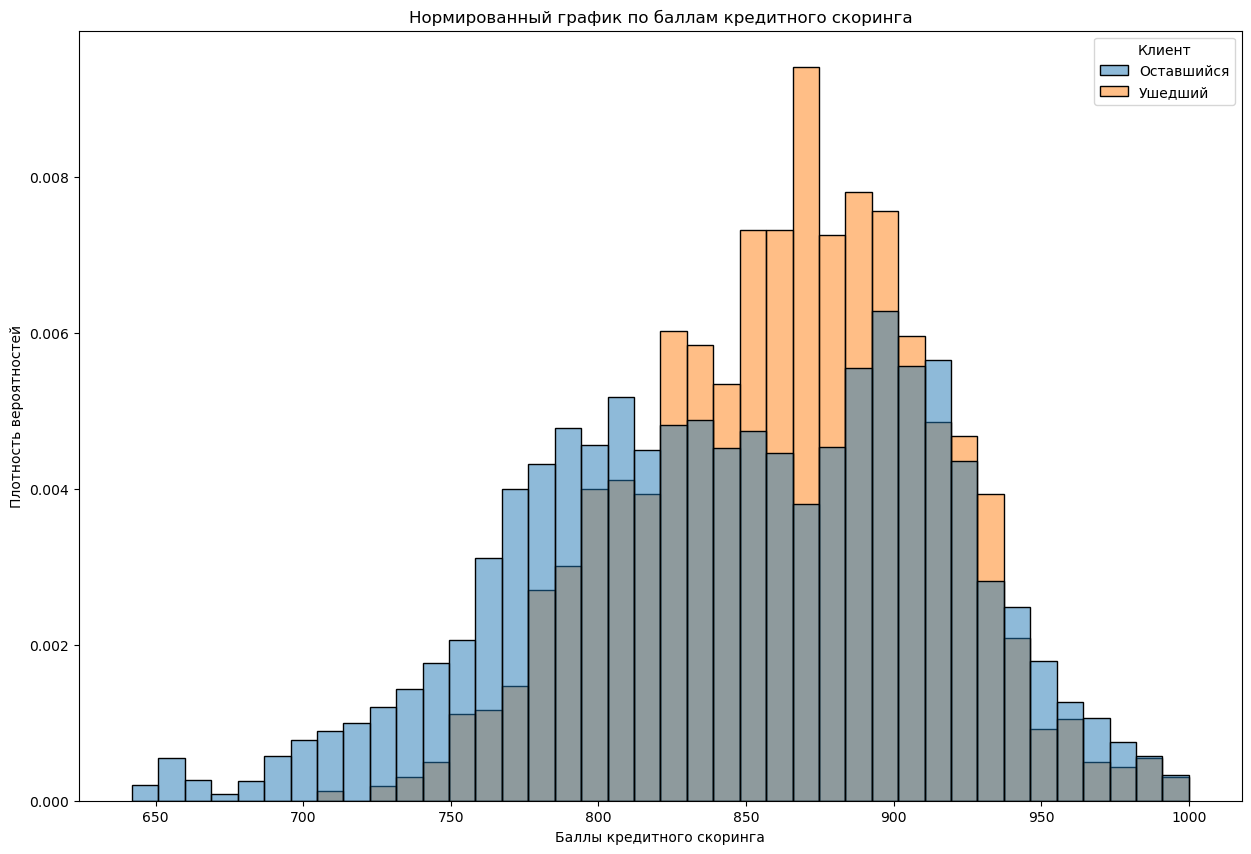

In [309]:
# Построим нормированный график распределения баллов кредитного скоринга
plt.figure(figsize=(15, 10))
g = sns.histplot(data=df, x='score', hue='churn', stat='density', common_norm=False)
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Плотность вероятностей')
plt.title('Нормированный график по баллам кредитного скоринга')
leg = g.axes.get_legend()
new_title = 'Клиент'
leg.set_title(new_title)
new_labels = ['Оставшийся', 'Ушедший']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

С 820 до 910 баллов кредитного скоринга повышается отток клиентов.

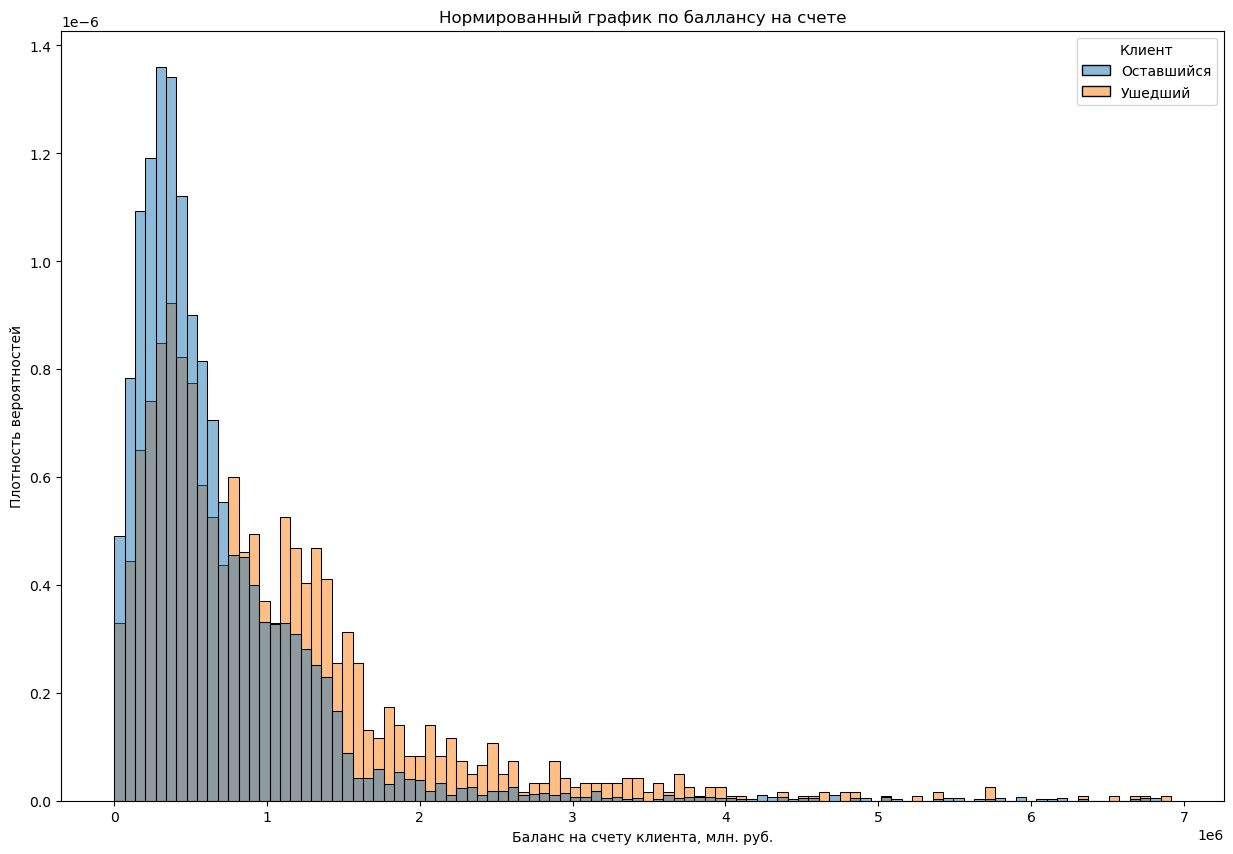

In [310]:
# Построим нормированный график распределения баланса на счету
plt.figure(figsize=(15, 10))
g = sns.histplot(data=df.query('balance<7000000'), x='balance', hue='churn', stat='density', common_norm=False)
plt.xlabel('Баланс на счету клиента, млн. руб.')
plt.ylabel('Плотность вероятностей')
plt.title('Нормированный график по баллансу на счете')
leg = g.axes.get_legend()
new_title = 'Клиент'
leg.set_title(new_title)
new_labels = ['Оставшийся', 'Ушедший']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

Отток клиентов повышается при балансе на счете от 700 тыс. до 4 млн руб.

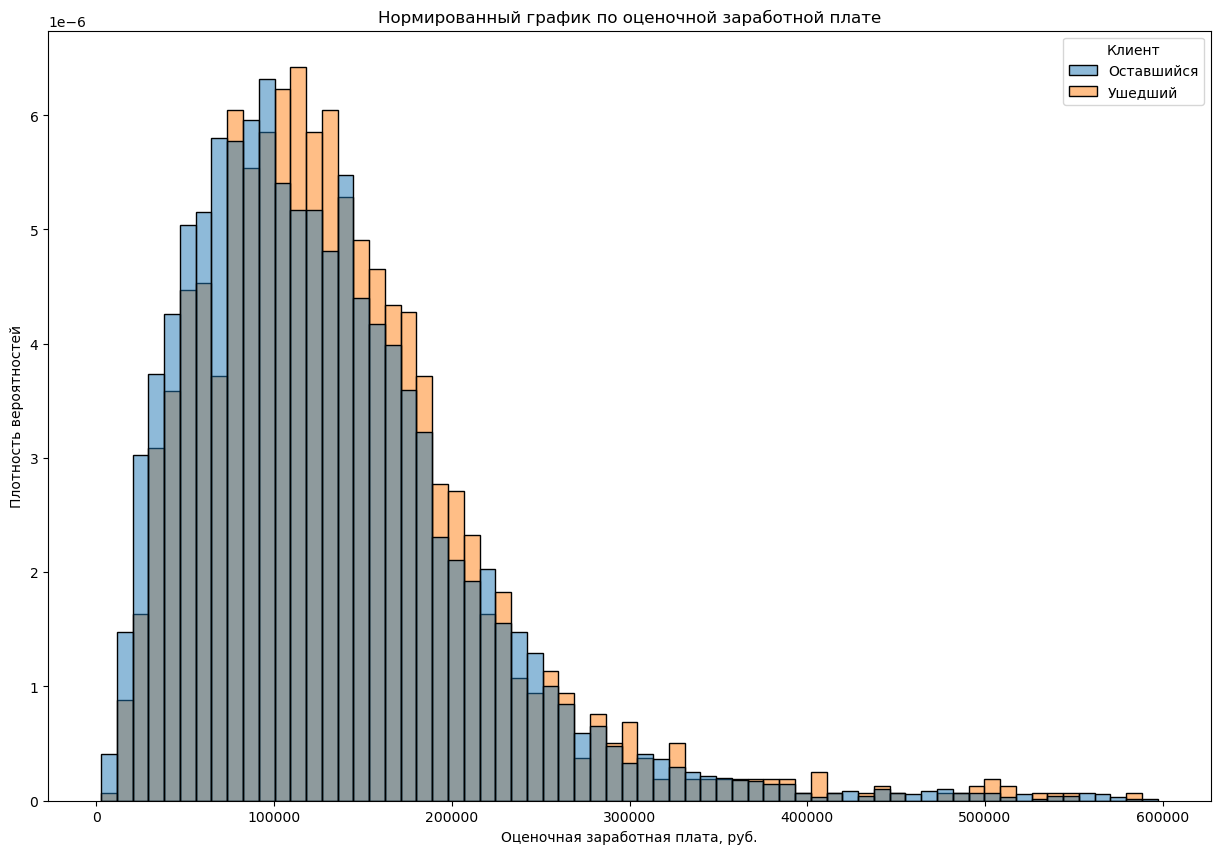

In [311]:
# Построим нормированный график распределения оценочной заработной платы
plt.figure(figsize=(15, 10))
g = sns.histplot(data=df.query('est_salary<600000'), x='est_salary', hue='churn', stat='density', common_norm=False)
plt.xlabel('Оценочная заработная плата, руб.')
plt.ylabel('Плотность вероятностей')
plt.title('Нормированный график по оценочной заработной плате')
leg = g.axes.get_legend()
new_title = 'Клиент'
leg.set_title(new_title)
new_labels = ['Оставшийся', 'Ушедший']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

При достижении заработной платы в 110 тыс. руб. оток клиентов повышается и продолжается до 210 тыс. руб.

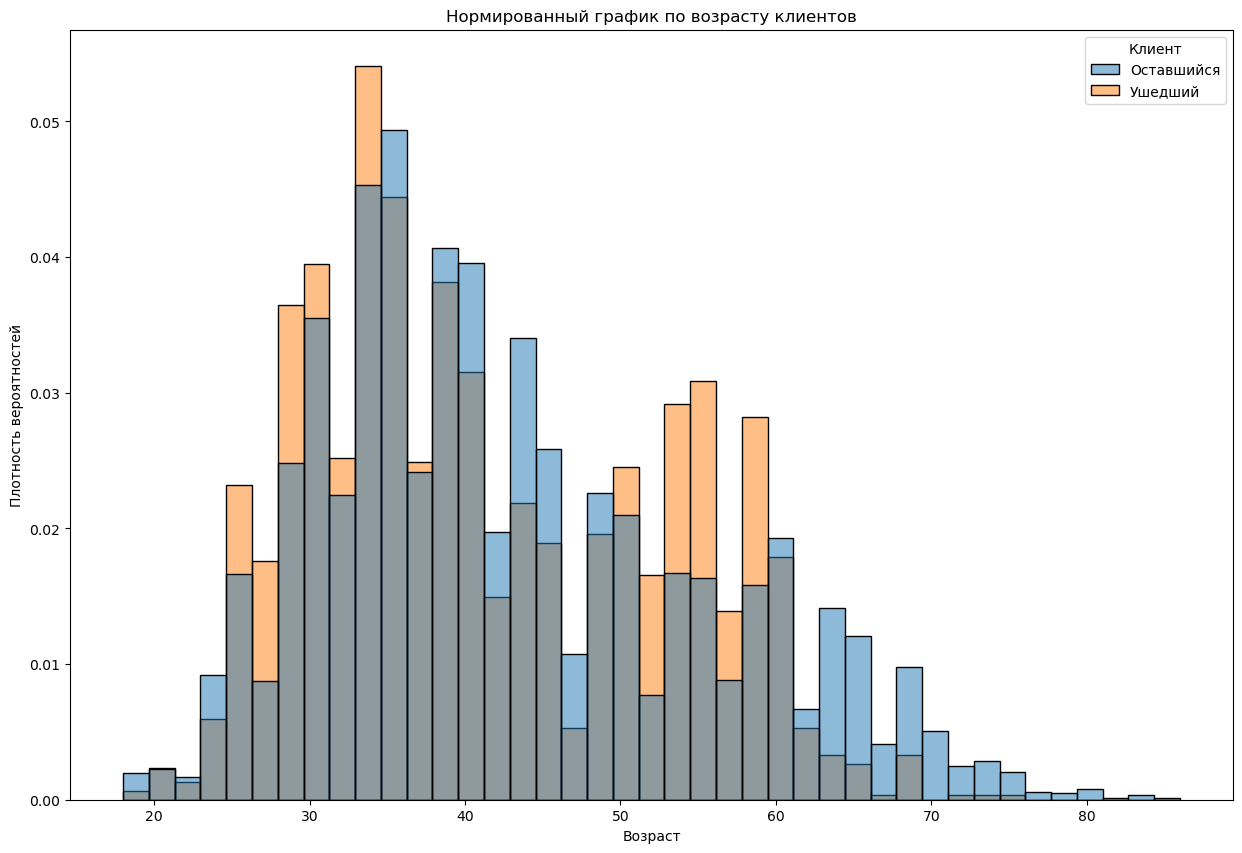

In [312]:
# Построим нормированный график распределения возраста клиентов
plt.figure(figsize=(15, 10))
g = sns.histplot(data=df, x='age', hue='churn', stat='density', common_norm=False)
plt.xlabel('Возраст')
plt.ylabel('Плотность вероятностей')
plt.title('Нормированный график по возрасту клиентов')
leg = g.axes.get_legend()
new_title = 'Клиент'
leg.set_title(new_title)
new_labels = ['Оставшийся', 'Ушедший']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)

Отток клиентов повышается в двух возрастных диапазонах:
* с 24 до 35 лет
* с 50 до 60 лет

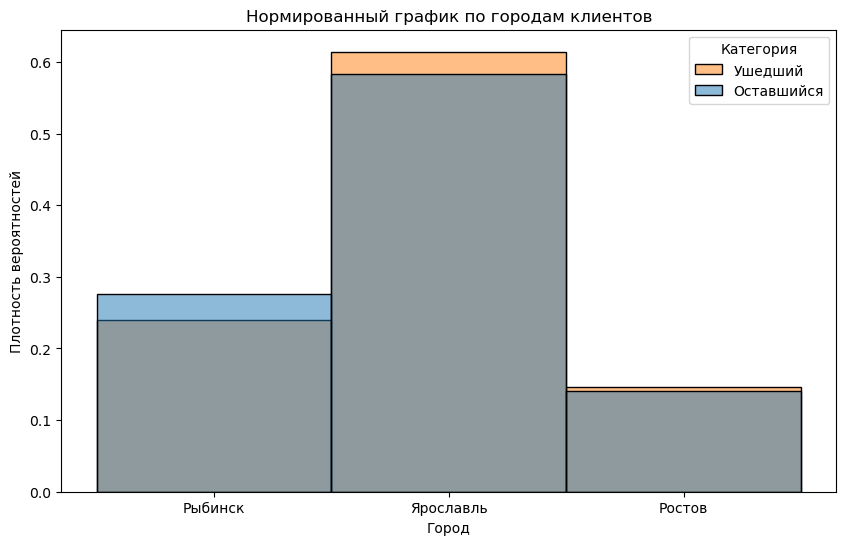

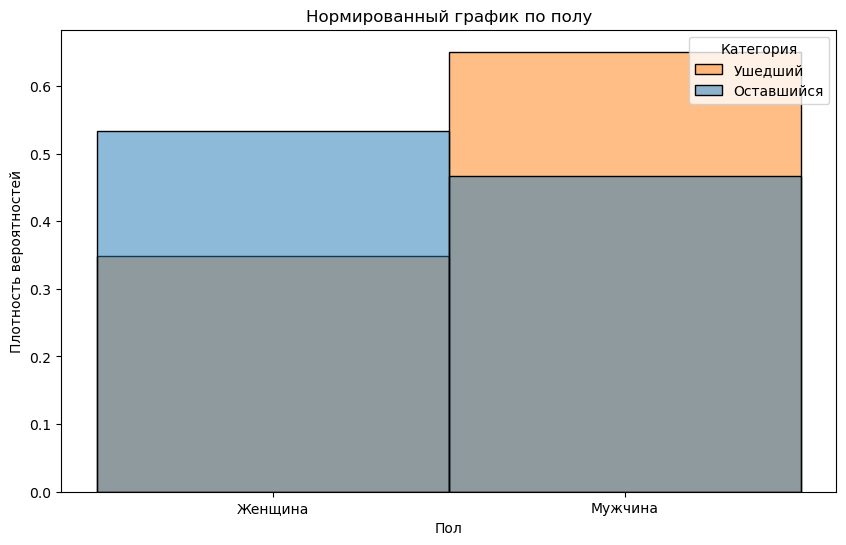

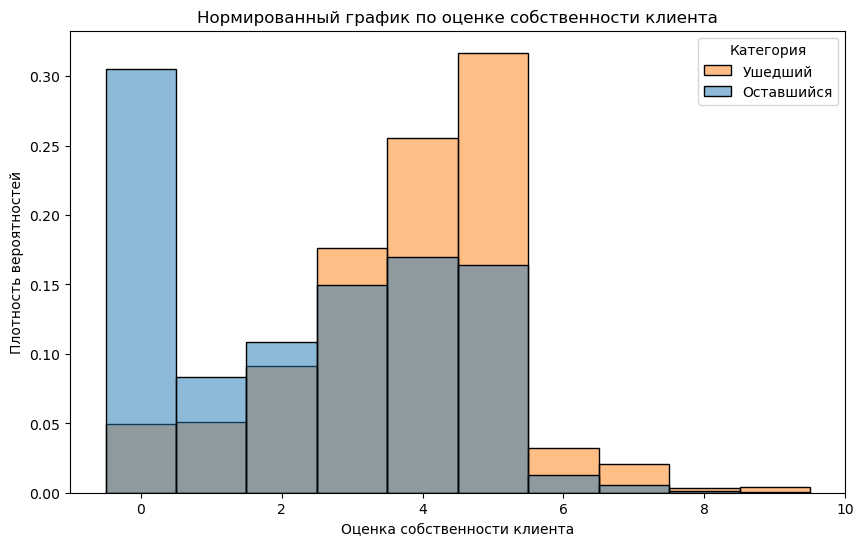

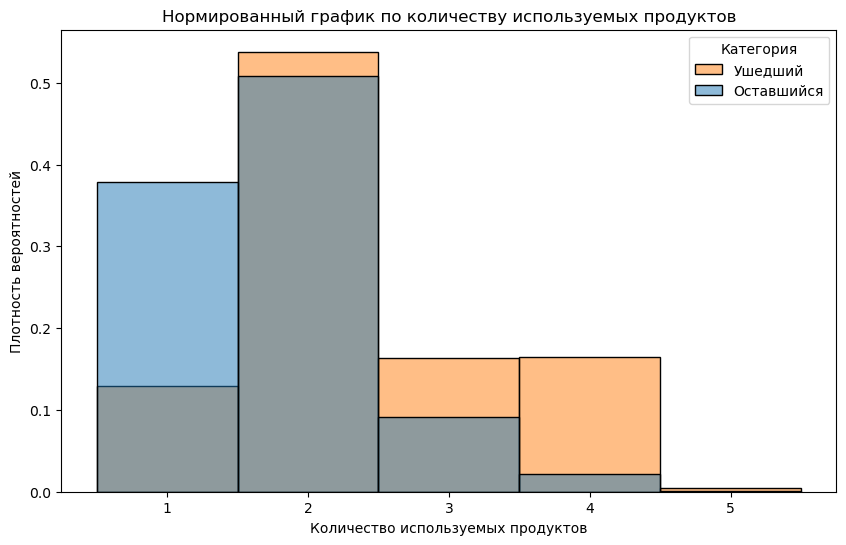

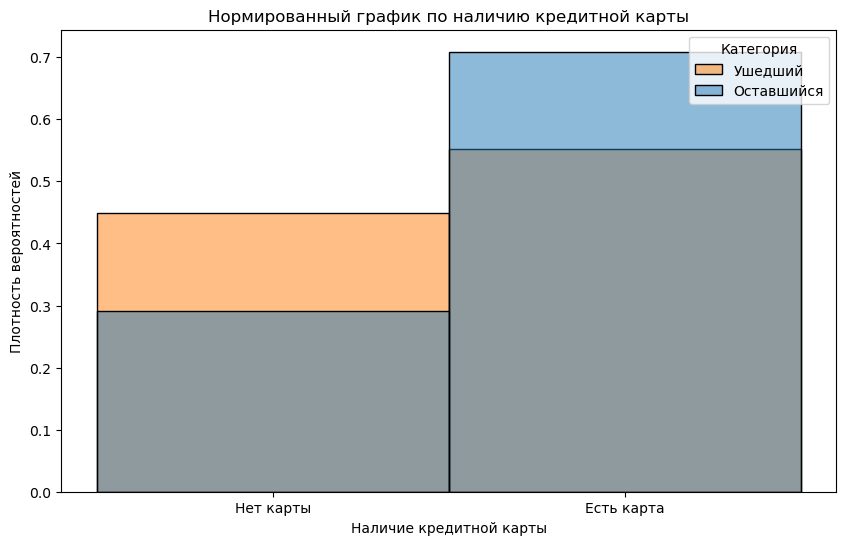

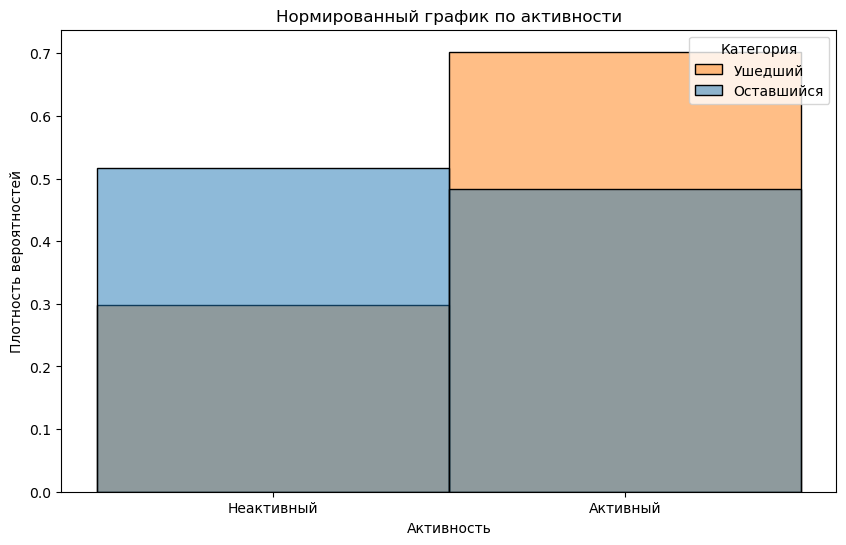

In [323]:
# Для категориальных характеристик построим нормированные графики плотности вероятностей
titles = {
    'city': 'Нормированный график по городам клиентов',
    'gender': 'Нормированный график по полу',
    'equity': 'Нормированный график по оценке собственности клиента',
    'products': 'Нормированный график по количеству используемых продуктов',
    'credit_card': 'Нормированный график по наличию кредитной карты',
    'last_activity': 'Нормированный график по активности',
}

# Подписи осей
x_labels = {
    'city': 'Город',
    'gender': 'Пол',
    'equity': 'Оценка собственности клиента',
    'products': 'Количество используемых продуктов',
    'credit_card': 'Наличие кредитной карты',
    'last_activity': 'Активность'
}

# Метки для категорий
x_labels_gender = ['Женщина', 'Мужчина']
x_labels_credit_card = ['Нет карты', 'Есть карта']
x_labels_last_activity = ['Неактивный', 'Активный']
new_labels = ['Ушедший', 'Оставшийся']

# Построение графиков
for param in ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity']:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(data=df, x=param, hue='churn', stat='density', common_norm=False, discrete = True)

    # Заголовок графика
    plt.title(titles[param])
    
    # Подпись оси Y
    plt.ylabel('Плотность вероятностей')
    
    # Подпись оси X и замена меток категорий
    if param == 'gender':
        ax.set_xticks([0, 1])
        ax.set_xticklabels(x_labels_gender)
        plt.xlabel(x_labels[param])
    elif param == 'credit_card':
        ax.set_xticks([0, 1])
        ax.set_xticklabels(x_labels_credit_card)
        plt.xlabel(x_labels[param])
    elif param == 'last_activity':
        ax.set_xticks([0, 1])
        ax.set_xticklabels(x_labels_last_activity)
        plt.xlabel(x_labels[param])
    else:
        plt.xlabel(x_labels[param])

    # Добавление легенды
    plt.legend(new_labels, title='Категория', loc='upper right')

    # Отображение графика
    plt.show()


* Больше всего клиентов из города Ярославль, меньше всего из Ростова. В Ярославле отточных клиентов немного больше, чем оставшихся. 
* Среди женщин незначительный отток клиентов. Среди клиентов мужчин высокий уровень оттока.
* Отток клиентов растет при достижении 3 и выше баллов собственности.
* При использовании клиентом 3 и более продуктов отток повышается.
* Клиенты, не пользующиеся кредитной картой чаще попадают в отток.
* Отток клиентов среди активных пользователей значительно выше, чем среди неактивных.

##### Построим матрицу корреляции оттока

interval columns not set, guessing: ['score', 'gender', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


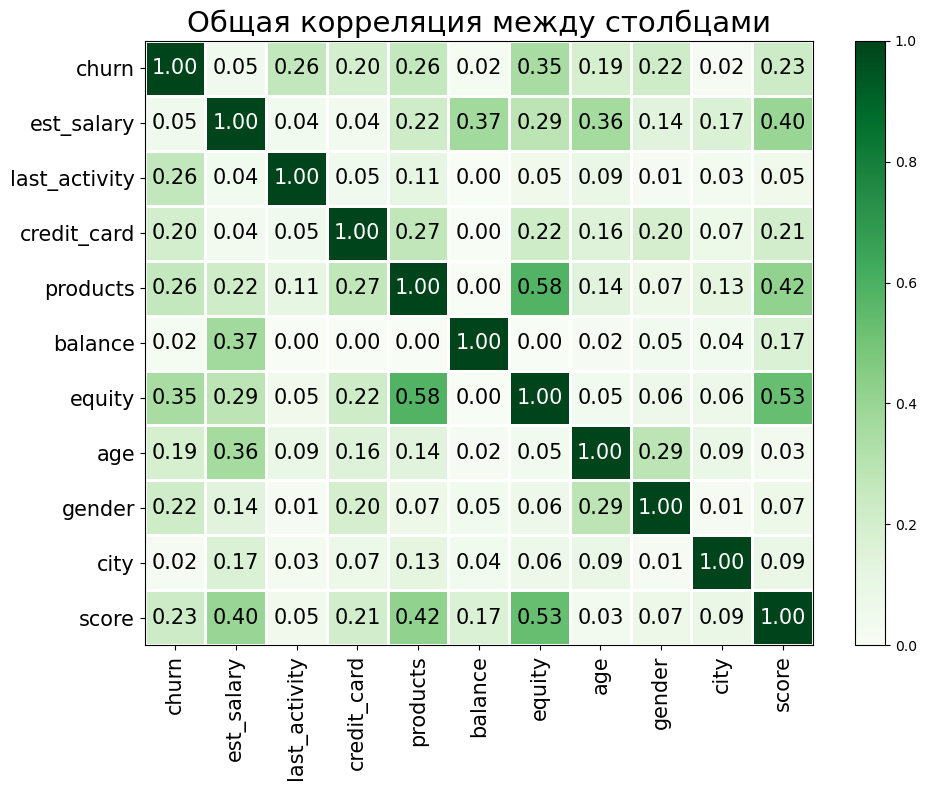

In [314]:
df_corr = df.drop(columns=['user_id'])
# Вычисление матрицы корреляции Phi-к
phik_overview = df_corr.phik_matrix()
# Построение тепловой карты корреляций
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Общая корреляция между столбцами", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.show()

Заметная корреляция присутствует у следующих столбцов:
* количество используемых продуктов и оценка баллов собственности;
* оценка баллов собственности и кредитный скоринг.

Умеренная корреляция присутствует у следующих столбцов:
* заработная плата и кредитный скоринг;
* заработная плата и баланс;
* заработная плата и возраст;
* кредитный скоринг и количество используемых продуктов.

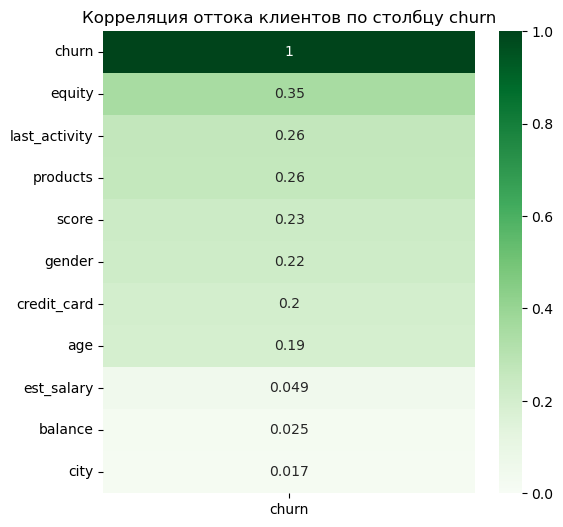

In [315]:
phik_churn = phik_overview[['churn']].sort_values(by = 'churn', ascending=False)
# Построение тепловой карты для столбца 'churn'
plt.figure(figsize=(6, 6))
sns.heatmap(phik_churn, annot=True, cmap='Greens', vmin=0, vmax=1)
plt.title('Корреляция оттока клиентов по столбцу churn')
plt.show()

Смотря на взаимосвязь по оттоку клиентов умеренная корреляция заметна со столбцом equity (количество баллов собственности).
<br>Слабая связь заметна со столбцами:
* активность в последнее время;
* количество используемых продуктов;
* кредитный скоринг;
* пол;
* наличие кредитной карты;
* возраст.
<br><br>Почти отсутствует корреляция с оттоком у города, баланса на счету, заработной платы.

**Вывод**

По средним значениям данных:
* Баллы кредитного скоринга находятся в диапазоне от 642 до 1000. Средний уровень кредитного скоринга - 849 баллов.
* Пол представлен примерно поровну.
* Средний возраст клиентов - 43 года. Максимальный - 86 лет.
* Приблизительная оценка собственности клиента, в среднем, составляет 2.6 баллов. Максимальная - 9 баллов.
* Медианный баланс клиентов составляет 524295 руб.
* В среднем, клиенты пользуются 1-2 продуктами.
* 68% клиентов пользуются кредитными картами.
* 52% клиентов были активными в последнее время.
* Медианная заработная плата клиентов составляет 119643 руб.
* Среднее значение оттока - 18%.

По портрету отточных клиентов:
* Средний балл кредитного скоринга немного выше у отточных клиентов (863 и 845 соответственно).
* Среди отточных клиентов больше мужчин (65%), чем у оставшихся (46%).
* Медианное значение возраста обоих групп почти равно.
* Оценка собственности у отточных клиентов выше.
* Медианный баланс у отточных клиентов выше (783908 руб. и 475410 руб. соответственно).
* Количество продуктов у клиентов обоих групп одинаковое - 2.
* Клиенты, попавшие в отток, реже пользуются кредитными картами (55%), чем оставшиеся (70%).
* Активность в последнеее время у отточных клиентов выше (70% и 48% соответственно).
* Средние заработные платы у клиентов обоих групп почти равны. Медианная заработная плата у отточных клиентов немного выше.

По распределению количественных данных:
* С 820 до 910 баллов кредитного скоринга повышается отток клиентов.
* Отток клиентов повышается при балансе на счету от 700 тыс. до 4 млн руб.
* При достижении заработной платы в 110 тыс. руб. оток клиентов повышается и продолжается до 210 тыс. руб.
* Отток клиентов повышается в двух возрастных диапазонах: с 24 до 35 лет, с 50 до 60 лет.

По распределению категориальных данных:
* Больше всего клиентов из города Ярославль, меньше всего из Ростова. В Ярославле отточных клиентов немного больше, чем оставшихся. Меньше всего отточных клиентов в Рыбинске.
* Среди женщин незначительный отток клиентов. Среди клиентов мужчин высокий уровень оттока.
* Отток клиентов растет при достижении 3 и выше баллов собственности.
* При использовании клиентом 3 и более продуктов отток повышается.
* Клиенты, не пользующиеся кредитной картой чаще попадают в отток.
* Отток клиентов среди активных пользователей значительно выше, чем среди неактивных.

По наличию корреляции:
<br>Смотря на взаимосвязь по оттоку клиентов умеренная корреляция заметна со столбцом equity (количество баллов собственности).
<br>Слабая связь заметна со столбцами:
* активность в последнее время;
* количество используемых продуктов;
* кредитный скоринг;
* пол;
* наличие кредитной карты;
* возраст.
<br>Почти отсутствует корреляция с оттоком у города, баланса на счету, заработной платы.

#### Проверка статистических гипотез

##### Проверим гипотезу различия доходов между теми клиентами, которые ушли и теми, которые остались.

Гипотезы:
<br>**Нулевая гипотеза (H0):** Средний доход (или медианный) у клиентов, которые ушли и тех, кто остался, одинаков.
<br>**Альтернативная гипотеза (H1):** Средний доход (или медианный) у клиентов, которые ушли, отличается от дохода тех, кто остался.

In [316]:
# Разделим данные на две группы: те, кто ушли (churn=1) и остались (churn=0)
est_salary_churn = df[df['churn'] == 1]['est_salary']
est_salary_stayed = df[df['churn'] == 0]['est_salary']
alpha = 0.05  # критический уровень статистической значимости

# Проверка нормальности с помощью теста Шапиро-Уилка
stat_churn, p_churn = stats.shapiro(est_salary_churn)
stat_stayed, p_stayed = stats.shapiro(est_salary_stayed)

# Если p-value больше alpha, то данные распределены нормально
print(f"Тест Шапиро для ушедших клиентов: p-value = {p_churn}")
if p_churn > alpha:
    print("Нормальное распределение")
else:
    print("Распределение ненормально")
print()
print(f"Тест Шапиро для оставшихся клиентов: p-value = {p_stayed}")
if p_stayed > alpha:
    print("Нормальное распределение")
else:
    print("Распределение ненормально") 

Тест Шапиро для ушедших клиентов: p-value = 7.609890177771483e-52
Распределение ненормально

Тест Шапиро для оставшихся клиентов: p-value = 2.8456627543974057e-86
Распределение ненормально


Вывод:
<br>Генеральные совокупности не зависят друг от друга;
<br>Распределение значений не является нормальным;
<br>При отсутствии нормального распределения сравниваемых выборок вместо t-критерия Стьюдента используются аналогичные методы непараметрической статистики, среди которых наиболее известными является тест Манна-Уитни.

In [317]:
# Проведем тест Манна-Уитни

alpha = 0.05  

results = stats.mannwhitneyu(est_salary_churn, est_salary_stayed)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение:  0.00016830729188229058
Отвергаем нулевую гипотезу


Вывод: на имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу об отсутствии различий между средними значениями доходов ушедших и оставшихся клиентов в пользу альтернативы. Можно предположить, что средние доходы ушедших и оставшихся клиентов отличаются.

##### Проверим гипотезу различия в возрасте между теми клиентами, которые ушли и теми, которые остались.

Гипотезы:
<br>**Нулевая гипотеза (H0):** Средний возраст (или медианный) у клиентов, которые ушли, и тех, кто остался, одинаков.
<br>**Альтернативная гипотеза (H1):** Средний возраст (или медианный) у клиентов, которые ушли, отличается от возраста тех, кто остался.

In [318]:
# Разделим данные на две группы: те, кто ушли (churn=1) и остались (churn=0)
age_churn = df[df['churn'] == 1]['age']
age_stayed = df[df['churn'] == 0]['age']
alpha = 0.05  # критический уровень статистической значимости

# Проверка нормальности с помощью теста Шапиро-Уилка
stat_churn, p_churn = stats.shapiro(age_churn)
stat_stayed, p_stayed = stats.shapiro(age_stayed)

# Если p-value больше alpha, то данные распределены нормально
print(f"Тест Шапиро для ушедших клиентов: p-value = {p_churn}")
if p_churn > alpha:
    print("Нормальное распределение")
else:
    print("Распределение ненормально")
print()
print(f"Тест Шапиро для оставшихся клиентов: p-value = {p_stayed}")
if p_stayed > alpha:
    print("Нормальное распределение")
else:
    print("Распределение ненормально")

Тест Шапиро для ушедших клиентов: p-value = 6.451985980816901e-24
Распределение ненормально

Тест Шапиро для оставшихся клиентов: p-value = 2.135441441670956e-43
Распределение ненормально


Вывод:
<br>Генеральные совокупности не зависят друг от друга;
<br>Распределение значений не является нормальным;
<br>Если данные не нормальны, применяем тест Манна-Уитни, который является непараметрическим и используется для сравнения двух независимых выборок.

In [319]:
# Проведем тест Манна-Уитни

alpha = 0.05  

results = stats.mannwhitneyu(age_churn, age_stayed)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение:  3.811912767980522e-06
Отвергаем нулевую гипотезу


Вывод: на имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу об отсутствии различий между средними возрастами доходов ушедших и оставшихся клиентов в пользу альтернативы. Можно предположить, что средние возрасты ушедших и оставшихся клиентов отличаются.

**Вывод**

Была проведена проверка двух гипотез:
1. Гипотеза о различии доходов между теми клиентами, которые ушли и теми, которые остались.
2. Гипотеза о различии в возрасте между теми клиентами, которые ушли и теми, которые остались.

В результате проверки двух гипотез были получены следующие выводы:
* **Гипотеза 1:** на имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу об отсутствии различий между средними значениями доходов ушедших и оставшихся клиентов в пользу альтернативы. Можно предположить, что средние доходы ушедших и оставшихся клиентов отличаются.    
* **Гипотеза 2:** на имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу об отсутствии различий между средними возрастами доходов ушедших и оставшихся клиентов в пользу альтернативы. Можно предположить, что средние возрасты ушедших и оставшихся клиентов отличаются.

#### Промежуточные выводы

На данном этапе можно выделить следующие параметры, влияющие на отток:
* Клиенты с кредитным скорингом от 820 до 910 баллов.
* Клиенты с балансом на счету от 700 тыс. до 4 млн руб.
* В возрасте от 24 до 35 лет, от 50 до 60 лет.
* С заработной платой от 110 тыс. до 210 тыс. руб.
* Клиенты мужчины.
* С баллом собственности от 3 и выше.
* Клиенты, пользующиеся 3 и более продуктами.
* Клиенты без кредитной карты.
* Активные клиенты.

В ходе проверки гипотез есть основания предположить, что есть зависимость между оттоком клиентов и их доходом и возрастом.

#### Сегментация на основе стратегических показателей

Выделим 3 высокоотточных сегментов, включающих в себя от 500 до 2000 клиентов. Для отбора сегментов по количественным и категорильным признакам обратимся к промежуточным выводам.

**Сегмент №1**

In [320]:
display(df.query('700000 <= balance <= 4000000 & 110000 < est_salary <= 210000').agg({'churn':['mean','count']}))

,churn
mean,0.3912
count,1301.0000


* Клиенты с балансом от 700000 до 4 млн руб.
* С заработной платой от 110000 до 210000 руб.
* Уровень оттока: 39%
* Количество клиентов: 1301

**Сегмент №2**

In [321]:
display(df.query('820 <= score <= 910 & equity >= 3 & 24 <= age <= 35').agg({'churn':['mean','count']}))

,churn
mean,0.3794
count,999.0000


* Клиенты с кредитным скорингом от 820 до 910 баллов.
* С баллами собственности от 3 и выше.
* В возрасте от 24 до 35 лет.
* Уровень оттока: 37%
* Количество клиентов: 999

**Сегмент №3**

In [322]:
display(df.query('gender == 1 & credit_card == 0 & last_activity == 1').agg({'churn':['mean','count']}))

,churn
mean,0.4206
count,718.0000


* Клиенты мужчины.
* Не пользующиеся кредитной картой.
* Активные в последнее время.
* Уровень оттока: 42%
* Количество клиентов: 718

**Вывод**

Были выделены 3 высокоотточных сегмента клиентов банка:
1. Сегмент №1
* Клиенты с балансом от 700000 до 4 млн руб.
* С заработной платой от 110000 до 210000 руб.
* Уровень оттока: 39%
* Количество клиентов: 1301
2. Сегмент №2
* Клиенты с кредитным скорингом от 820 до 910 баллов.
* С баллами собственности от 3 и выше.
* В возрасте от 24 до 35 лет.
* Уровень оттока: 37%
* Количество клиентов: 999
3. Сегмент №3
* Клиенты мужчины.
* Не пользующиеся кредитной картой.
* Активные в последнее время.
* Уровень оттока: 42%
* Количество клиентов: 718

Рекомендации для сегментов:
1. В первом сегменте представлены клиенты с высокой заработной платой и балансом выше среднего. Таким клиентам можно предложить:
* Премиальные сберегательные счета: счета с высокими процентными ставками и бонусами за долгосрочные депозиты.
* Страховые продукты: страхование жизни, здоровья, недвижимости и имущества с премиальными условиями.
* Премиальные инвестиционные счета: премиальные инвестиционные счета с высокими процентными ставками и разнообразными инвестиционными опциями.
* Управление капиталом: услуги профессионального управления капиталом, включая индивидуальные консультации с финансовыми консультантами.
2. Во втором сегменте представлены клиенты с высоким кредитным скорингом и с высокими баллами собственности. Таким клиентам можно предложить:
* Ипотечные кредиты: привлекательные условия по ипотечным кредитам для покупки недвижимости, с низкими процентными ставками и гибкими условиями погашения.
* Персональные кредиты: низкие процентные ставки и гибкие условия для личных кредитов на крупные покупки или инвестиции.
* Автокредиты: специальные условия для автокредитования, включая скидки на страховку и обслуживание.
* Страхование недвижимости: программы страхования для защиты инвестиций в недвижимость.
3. В третьем сегменте представлены мужчины, не пользующиеся кредитной картой, активные пользователи. Таким клиентам можно предложить:
* Кредитные карты с низкими процентными ставками: кредитные карты с низкими процентными ставками и без годового обслуживания, чтобы привлечь их к использованию кредитных продуктов.
* Карты с бонусными программами: кредитные карты с программами кэшбэка, бонусов и скидок в мужских магазинах одежды, магазинах электронки, барбершопах, магазинах автозапчастей, фитнес-центрах.

#### Общий вывод

Был проанализирован отток клиентов банка "Метанпром", выделены наиболее слонные к оттоку сегменты пользователей. Даны рекомендации отделу маркетинга по снижению оттока.

1. На этапе предобработки данных столбцы были приведены к стилю snake_case, обработаны пропуски, заменены типы данных, была удалена 1 строка с аномальным значением.

2. На этапе исследовательского анализа:
 
 2.1 Составлен общий портрет клиента:
 * Баллы кредитного скоринга находятся в диапазоне от 642 до 1000. Средний уровень кредитного скоринга - 849 баллов.
 * Пол представлен примерно поровну.
 * Средний возраст клиентов - 43 года. Максимальный - 86 лет.
 * Приблизительная оценка собственности клиента, в среднем, составляет 2.6 баллов. Максимальная - 9 баллов.
 * Медианный баланс клиентов составляет 524295 руб.
 * В среднем, клиенты пользуются 1-2 продуктами.
 * 68% клиентов пользуются кредитными картами.
 * 52% клиентов были активными в последнее время.
 * Медианная заработная плата клиентов составляет 119643 руб.
 * Среднее значение оттока - 18%.

 2.2 Составлен портрет отточных клиентов:
 * Средний балл кредитного скоринга немного выше у отточных клиентов (863 и 845 соответственно).
 * Среди отточных клиентов больше мужчин (65%), чем у оставшихся (46%).
 * Медианное значение возраста обоих групп почти равно.
 * Оценка собственности у отточных клиентов выше.
 * Медианный баланс у отточных клиентов выше (783908 руб. и 475410 руб. соответственно).
 * Количество продукто у клиентов обоих групп одинаковое - 2.
 * Клиенты, попавшие в отток, реже пользуются кредитными картами (55%), чем оставшиеся (70%).
 * Активность в последнеее время у отточных клиентов выше (70% и 48% соответственно).
 * Средние заработные платы у клиентов обоих групп почти равны. Медианная заработная плата у отточных клиентов немного выше.
 
 2.3 Получены выводы по распределению количественных данных:
 * С 820 до 910 баллов кредитного скоринга повышается отток клиентов.
 * Отток клиентов повышается при балансе на счету от 700 тыс. до 4 млн руб.
 * При достижении заработной платы в 110 тыс. руб. оток клиентов повышается и продолжается до 210 тыс. руб.
 * Отток клиентов повышается в двух возрастных диапазонах: с 24 до 35 лет, с 50 до 60 лет.

 2.4 Получены выводы по распределению категориальных данных:
 * Больше всего клиентов из города Ярославль, меньше всего из Ростова. В Ярославле отточных клиентов немного больше, чем оставшихся. Меньше всего отточных клиентов в Рыбинске.
 * Среди женщин незначительный отток клиентов. Среди клиентов мужчин высокий уровень оттока.
 * Отток клиентов растет при достижении 3 и выше баллов собственности.
 * При использовании клиентом 3 и более продуктов отток повышается.
 * Клиенты, не пользующиеся кредитной картой чаще попадают в отток.
 * Отток клиентов среди активных пользователей значительно выше, чем среди неактивных. 
 
 2.5 Получены выводы по наличию корреляции:
  <br>Смотря на взаимосвязь по оттоку клиентов умеренная корреляция заметна со столбцом equity (количество баллов собственности).
  <br> Слабая связь заметна со столбцами:
 * активность в последнее время;
 * количество используемых продуктов;
 * кредитный скоринг;
 * пол;
 * наличие кредитной карты;
 * возраст.
 <br>Почти отсутствует корреляция с оттоком у города, баланса на счету, заработной платы. 


3. Были проверены статистические гипотезы:
 * Гипотеза о различии доходов между теми клиентами, которые ушли и теми, которые остались.
 * Гипотеза о различии в возрасте между теми клиентами, которые ушли и теми, которые остались.

 В результате проверки двух гипотез были получены следующие выводы:
 * **Гипотеза 1:** на имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу об отсутствии различий между средними значениями доходов ушедших и оставшихся клиентов в пользу альтернативы. Можно предположить, что средние доходы ушедших и оставшихся клиентов отличаются.    
 * **Гипотеза 2:** на имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу об отсутствии различий между средними возрастами доходов ушедших и оставшихся клиентов в пользу альтернативы. Можно предположить, что средние возрасты ушедших и оставшихся клиентов отличаются.


4. Сегментация клиентов на основе стратегических показателей:

Были выделены 3 высокоотточных сегмента клиентов банка:
1. Сегмент №1
* Клиенты с балансом от 700000 до 4 млн руб.
* С заработной платой от 110000 до 210000 руб.
* Уровень оттока: 39%
* Количество клиентов: 1301
2. Сегмент №2
* Клиенты с кредитным скорингом от 820 до 910 баллов.
* С баллами собственности от 3 и выше.
* В возрасте от 24 до 35 лет.
* Уровень оттока: 37%
* Количество клиентов: 999
3. Сегмент №3
* Клиенты мужчины.
* Не пользующиеся кредитной картой.
* Активные в последнее время.
* Уровень оттока: 42%
* Количество клиентов: 718

Рекомендации для сегментов:
1. В первом сегменте представлены клиенты с высокой заработной платой и балансом выше среднего. Таким клиентам можно предложить:
* Премиальные сберегательные счета: счета с высокими процентными ставками и бонусами за долгосрочные депозиты.
* Страховые продукты: страхование жизни, здоровья, недвижимости и имущества с премиальными условиями.
* Премиальные инвестиционные счета: премиальные инвестиционные счета с высокими процентными ставками и разнообразными инвестиционными опциями.
* Управление капиталом: услуги профессионального управления капиталом, включая индивидуальные консультации с финансовыми консультантами.
2. Во втором сегменте представлены клиенты с высоким кредитным скорингом и с высокими баллами собственности. Таким клиентам можно предложить:
* Ипотечные кредиты: привлекательные условия по ипотечным кредитам для покупки недвижимости, с низкими процентными ставками и гибкими условиями погашения.
* Персональные кредиты: низкие процентные ставки и гибкие условия для личных кредитов на крупные покупки или инвестиции.
* Автокредиты: специальные условия для автокредитования, включая скидки на страховку и обслуживание.
* Страхование недвижимости: программы страхования для защиты инвестиций в недвижимость.
3. В третьем сегменте представлены мужчины, не пользующиеся кредитной картой, активные пользователи. Таким клиентам можно предложить:
* Кредитные карты с низкими процентными ставками: кредитные карты с низкими процентными ставками и без годового обслуживания, чтобы привлечь их к использованию кредитных продуктов.
* Карты с бонусными программами: кредитные карты с программами кэшбэка, бонусов и скидок в мужских магазинах одежды, магазинах электронки, барбершопах, магазинах автозапчастей, фитнес-центрах.